<a href="https://colab.research.google.com/github/pawan-cpu/Learn-Python-with-Pawan-Kumar/blob/main/59Pro21Jan_whitehatAIFC_Project_59_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Car Prediction - Data exploration
 
 
 

---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

 https://colab.research.google.com/drive/1NJ7FmhsMBMjqqsPzD0lsuomnmZThOc2Y

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project68** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

The most important factor for an Insurance Company is to determine what premium charges must be paid by an individual. The charges depend on various factors like age, gender, income, etc. 

Build a model that is capable of predicting the insurance charges a person has to pay depending on the given features using multiple linear regression. 

---

### List of Activities
 
**Activity 1:** Analysing the Dataset

**Activity 2:** Feature Encoding

**Activity 3:** Exploratory Data Analysis

**Activity 4:** Train-Test Split
 
**Activity 5:** Model Training using `statsmodels.api`



 


---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Insurance** dataset using the below link. This dataset consists of following columns:

|Field|Description|
|---:|:---|
|age|Age of primary beneficiary|
|sex|Insurance contractor gender, female or male|
|bmi|Body mass index|
|children|Number of children covered by health insurance/number of dependents|
|region|Beneficiary's residential area in the US, northeast, southeast, southwest, northwest|
|charges|Individual medical costs billed by health insurance|


  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/insurance_dataset.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Create a regression plot with `age` on X-axis and `charges` on Y-axis to identify the relationship between these two attributes.




In [2]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/insurance_dataset.csv')
df
# Print first five rows using head() function
df.head()

,age,sex,bmi,children,region,charges
0,18,male,33.770,1,southeast,1725.55230
1,28,male,33.000,3,southeast,4449.46200
2,33,male,22.705,0,northwest,21984.47061
3,32,male,28.880,0,northwest,3866.85520
4,31,female,25.740,0,southeast,3756.62160


In [3]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64

In [4]:
# Print the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   region    1064 non-null   object 
 5   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 50.0+ KB


----

#### Activity 2 : Feature Encoding

The `sex` and `region` columns are categorical attributes. Convert these attributes into numerical ones so that they can be used for linear regression analysis using `map()` function. 

- Map the following values for the `sex` column:

  - `male` to `0`
  - `female` to `1`

- Map the following values for the `region` column:

 - `southeast` to `1`
 - `southwest` to `2`
 - `northeast` to `3`
 - `northwest` to `4`


In [5]:
# Count the occurrence of each value in the 'sex' column.
new = pd.Series(["male", "female"])
new_dict = {"male": 2, "female": 1}
new = new.map(new_dict)
new

0    2
1    1
dtype: int64

In [6]:
# Use the 'map()' function to replace values in 'sex' column to their corresponding numeric values.
def num_map(series):
    return series.map(new_dict)

# Applying the function to the two columns
df[['sex']] = df[['sex']].apply(num_map, axis = 1)

In [7]:
# Again count the occurrence of each value in the 'sex' column to verify whether all values are correctly mapped


In [8]:
# Count the occurrence of each value in the 'region' column.
new1 = pd.Series(["southeast","southwest","northeast","northwest"])
new1_dict = {"southeast":1,"northeast": 3,"northwest":4,"southwest":2}
new1 = new1.map(new1_dict)
new

0    2
1    1
dtype: int64

In [9]:
# Use the 'map()' function to replace a value in the 'region' column to their corresponding numeric values.

# Applying the function to the two columns
df['region'] = df['region'].map({"southeast":1,"northeast": 3,"northwest":4,"southwest":2})

In [10]:
# Again count the occurrence of each value in the 'region' column to verify whether all values are correctly mapped
df['region'].head()

0    1
1    1
2    4
3    4
4    1
Name: region, dtype: int64

---

#### Activity 3: Exploratory Data Analysis


Create the heat-map to look into the correlation of the features

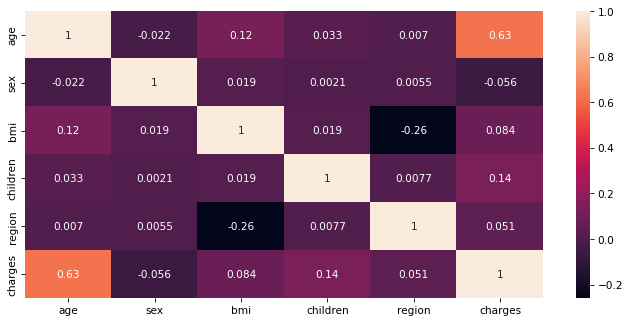

In [11]:
# Draw a correlation heatmap between the features.
plt.figure(figsize = (11, 5), dpi = 76)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
features = list(df.columns.values)
features.remove('charges')
features

['age', 'sex', 'bmi', 'children', 'region']

---

#### Activity 4: Train-Test Split


Split the dataset into training set and test set such that the training set contains 67% of the instances and the remaining instances will become the test set and keep the `charges` as the target variables.

In [15]:
# Split the 'df' Dataframe into the train and test sets.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df[features]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

---

#### Activity 5: Model Training using `statsmodels.api`

Now build a multiple linear regression model using the `statsmodels.api` module.
Also, print the summary of the linear regression model built.

In [16]:
#  Build a linear regression model using all the features to predict insurance charges.
import statsmodels.api as sm


# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


const      -3323.855878
age          255.783127
sex         -596.474438
bmi           32.531515
children     591.431434
region       347.830037
dtype: float64

In [17]:
# Print the summary of the linear regression report.
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     92.65
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           5.67e-75
Time:                        09:07:27   Log-Likelihood:                -7018.7
No. Observations:                 712   AIC:                         1.405e+04
Df Residuals:                     706   BIC:                         1.408e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3323.8559   1248.742     -2.662      0.0




**Q:** What is the $R^2$ value?

**A:** 0.396


**Q:** Is there multicollinearity in the model?

**A:** No




---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project68**) of the notebook will get copied 

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project68** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800> 

---